In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sbi.inference import (
    likelihood_estimator_based_potential,
    SNLE,
    prepare_for_sbi,
    simulate_for_sbi,
    VIPosterior,
)
from sbi import utils as utils
from sbi import analysis as analysis

_ = torch.manual_seed(0)

In [2]:
num_dim = 2
prior = utils.BoxUniform(low=[4.2,0.005], high=[5.8,0.025])

In [3]:
def generate_ar1_time_series(theta):
    time_series = np.zeros(length)
    time_series[0] = x_0
    for t in range(1, length):
        noise = np.random.normal(0, theta[1])
        time_series[t] =  theta[0] * time_series[t - 1]**2 * (1-time_series[t - 1]) + noise
    return time_series

In [6]:
length = 200
x_0 = 0.25
simulator, prior = prepare_for_sbi(generate_ar1_time_series, prior)

In [7]:
inference = SNLE(prior=prior)

In [8]:
c = 5.3
noise_std = 0.015

x_o = generate_ar1_time_series([c, noise_std])

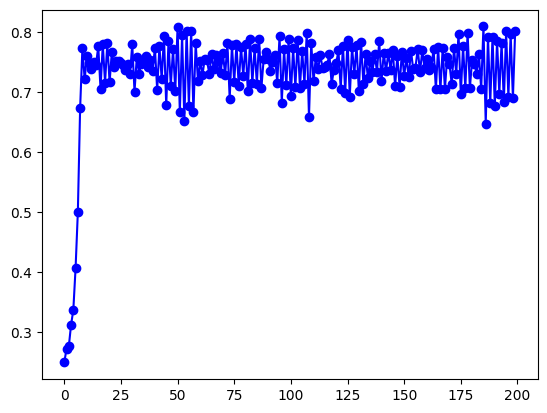

In [14]:
plt.plot(x_o, label='Time Series Data', color='blue', marker='o', linestyle='-')

In [15]:
rounds = 3
num_sims = 500
inference = SNLE(prior)
proposal = prior
for _ in range(rounds):
    theta = proposal.sample((num_sims,))
    x = simulator(theta)
    _ = inference.append_simulations(theta, x).train()
    posterior = inference.build_posterior().set_default_x(x_o)
    proposal = posterior

 Neural network successfully converged after 514 epochs.

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5100 [00:00<?, ?it/s]

 Neural network successfully converged after 53 epochs.

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/5100 [00:00<?, ?it/s]

 Neural network successfully converged after 36 epochs.

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/10100 [00:00<?, ?it/s]

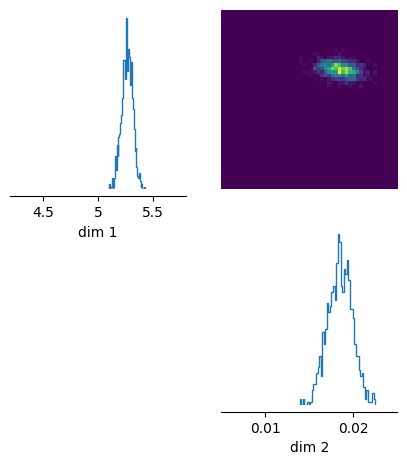

In [17]:
posterior_samples = posterior.sample((1000,), x=x_o)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples, limits=[[4.2, 5.8], [0.005, 0.025]], figsize=(5, 5)
)

In [18]:
AR1PostSampleArray = posterior_samples.numpy()

In [19]:
np.savetxt("test.txt", AR1PostSampleArray, delimiter=',')

In [12]:
num_rounds = 3

posteriors = []
proposal = prior

for _ in range(num_rounds):
    theta, x = simulate_for_sbi(simulator, proposal, num_simulations=500)
    likelihood_estimator = inference.append_simulations(
        theta, x,
    ).train()
    potential_fn, theta_transform = likelihood_estimator_based_potential(
        likelihood_estimator, prior, x_o
    )

    posterior = VIPosterior(
        potential_fn, prior, "maf", theta_transform, vi_method="fKL",
    ).train()
    posteriors.append(posterior)
    proposal = posterior

Running 500 simulations.:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 512 epochs.

  0%|          | 0/2000 [00:00<?, ?it/s]

Quality Score: -0.578 	 Good: Smaller than 0.5  Bad: Larger than 1.0 	         NOTE: Less sensitive to mode collapse.


Running 500 simulations.:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 140 epochs.

  0%|          | 0/2000 [00:00<?, ?it/s]

Quality Score: -0.622 	 Good: Smaller than 0.5  Bad: Larger than 1.0 	         NOTE: Less sensitive to mode collapse.


Running 500 simulations.:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 78 epochs.

  0%|          | 0/2000 [00:00<?, ?it/s]

Quality Score: -0.446 	 Good: Smaller than 0.5  Bad: Larger than 1.0 	         NOTE: Less sensitive to mode collapse.


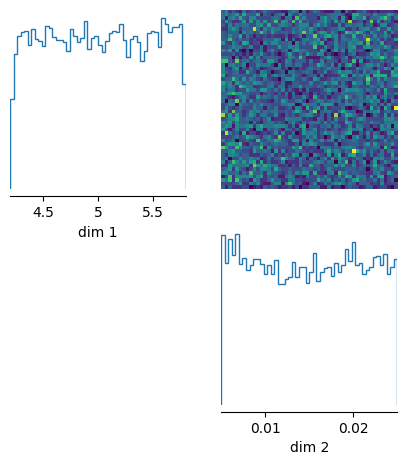

In [13]:
posterior_samples = posterior.sample((10000,), x=x_o)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples, limits=[[4.2, 5.8], [0.005, 0.025]], figsize=(5, 5)
)